In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
#import scipy.signal

In [2]:
def rk4_step(f, y, t, dt):
    k1 = f(y, t)
    k2 = f(y + 0.5 * dt * k1, t + 0.5 * dt)
    k3 = f(y + 0.5 * dt * k2, t + 0.5 * dt)
    k4 = f(y + dt * k3, t + dt)
    return y + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

def system(y, t, g, n):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = -(2+n) * g**2 * y1 + 2 * g**2 * y1**3
    return np.array([dy1_dt, dy2_dt])

def solve_ode(g, n, y0, t0, t1, dt):
    t_values = np.arange(t0, t1, dt)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        y_values[i] = rk4_step(lambda y, t: system(y, t, g, n), y_values[i-1], t_values[i-1], dt)

    return y_values

In [ ]:
# Parameters
g = 1.0
y0 = [1.0, 0.0]  # Initial conditions: y(0) = 1, y'(0) = 0
t0 = 0.0
t1 = 200.0
dt = 0.01
t_values = np.arange(t0, t1, dt)

n_values = np.linspace(0.0, 1.5, 500)

y_values = np.zeros((len(n_values), len(t_values)))

In [ ]:
# Solve the ODE
index = 0 
for n in tqdm(n_values):
    y = solve_ode(g, n, y0, t0, t1, dt)
    y_values[index, :] = y[:,0]
    index += 1

np.savetxt('y_values.csv', y_values, delimiter=',')

In [ ]:
# Set the font to Times New Roman
plt.rcParams['font.family'] = 'stix'#, 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['font.size'] = 11

In [6]:
y_values=np.loadtxt('y_values.csv', delimiter=',')
print(y_values.shape)

(500, 20000)


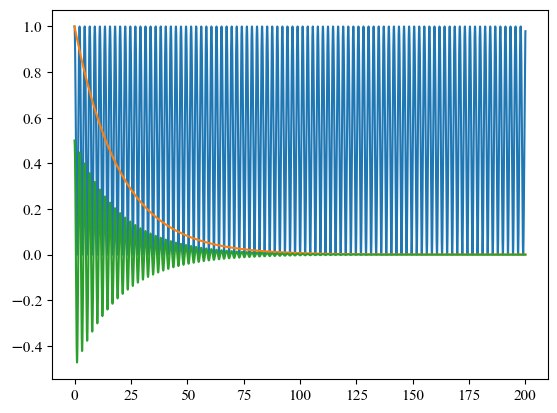

In [7]:
alpha=0.05
win = np.exp(-alpha * t_values)
y_winned=(y_values**2-0.5)*win
plt.plot(t_values, y_values[-1, :]**2)
plt.plot(t_values, win)
plt.plot(t_values, y_winned[-1, :])

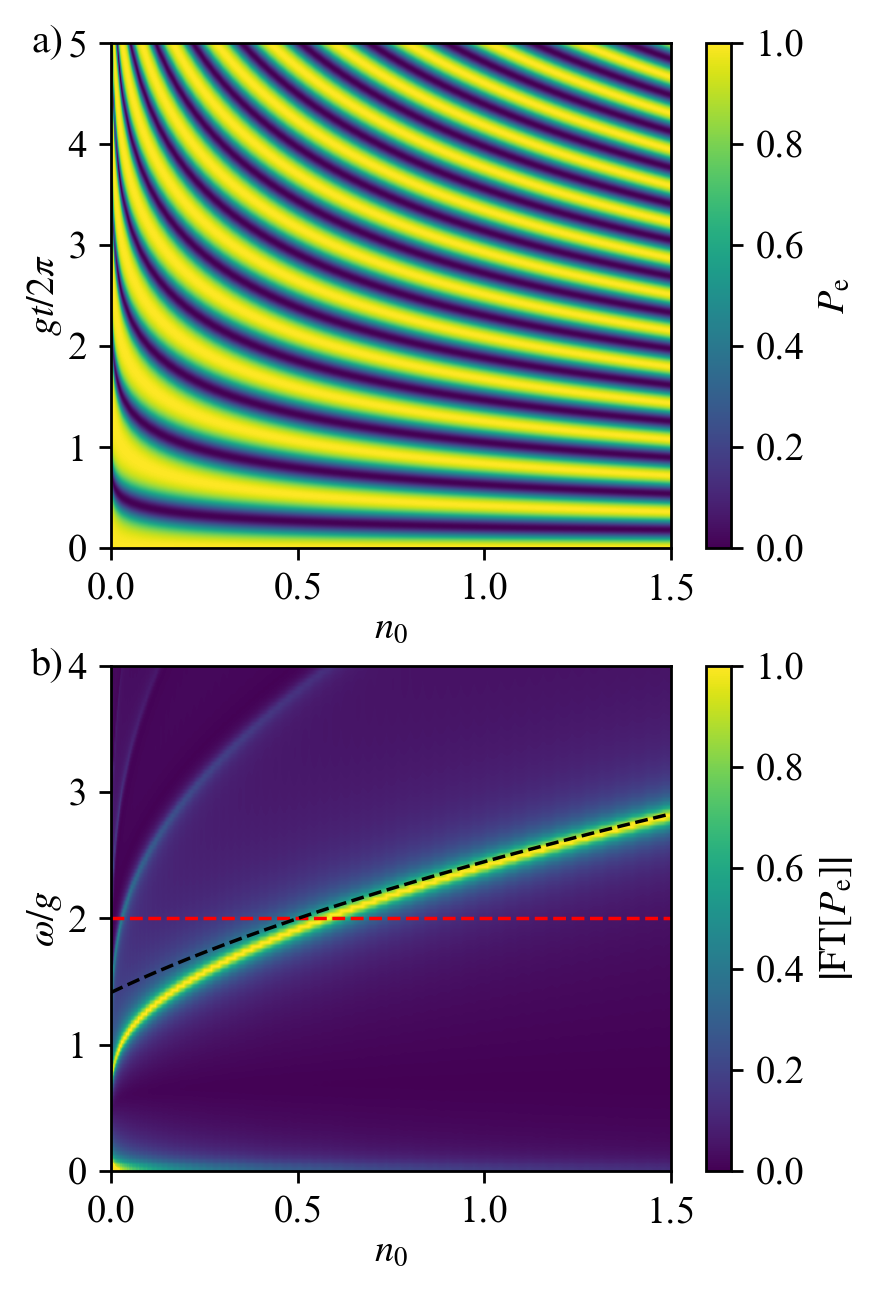

In [12]:
fft_data = np.fft.rfft(y_winned, axis=1)
max_fft_data = np.max(np.abs(fft_data[:, 10:]), axis=1)
frequencies = np.fft.rfftfreq(len(t_values), dt)*(2*np.pi)

# Create a figure with 2 subplots
fig, axs = plt.subplots(2, 1, figsize=(3.37, 5.0), dpi=250)

# First subplot: Heatmap of y(t) for different values of n
axs[0].imshow(y_values.T**2, aspect='auto', extent=[n_values[0], n_values[-1], t0/(2*np.pi), t1/(2*np.pi)], origin='lower', cmap='viridis')
axs[0].set_xlabel(r"$n_0$", labelpad=1)
axs[0].set_ylabel(r"$gt/2\pi$", labelpad=1)
fig.colorbar(axs[0].images[0], ax=axs[0], label=r"$P_\mathrm{e}$")#, fraction=0.03, pad=0.04)
axs[0].set_ylim([0.0, 5.0])
axs[0].set_xlim([0,1.5])
#axs[0].set_xticks([]) 

# Second subplot: Heatmap of the Fourier transform magnitudes
im = axs[1].imshow(np.abs(fft_data[:, :]).T/max_fft_data.T, aspect='auto', extent=[n_values[0], n_values[-1], frequencies[0], frequencies[-1]], origin='lower', cmap='viridis', vmin=0, vmax=1)
fig.colorbar(im, ax=axs[1], label=r"$\left|\mathrm{FT}[P_\mathrm{e}]\right|$")#,  fraction=0.03, pad=0.04)
axs[1].set_xlabel(r"$n_0$", labelpad=1)
axs[1].set_ylabel(r"$\omega/g$", labelpad=1)
axs[1].axhline(y=2, color='red', linestyle='--', linewidth=1)
#axs[1].axvline(x=0.589, color='white', linestyle='--', linewidth=1)
axs[1].set_ylim([0, 4.0])
axs[1].set_xlim([0, 1.5])
#axs[1].set_yticks([0, 1, 2, 3, 4, 5]) 

# Define x values for the line
x_values = np.linspace(n_values[0], n_values[-1], 1000)
y_line = 2*np.sqrt(x_values + 0.5)
y_line2 = 2*np.sqrt(x_values + 1)
y_line3 = 2*np.sqrt(x_values)

# Plot the line on the first subplot
axs[1].plot(x_values, y_line, color='black', linestyle='--', linewidth=1)
#axs[1].plot(x_values, y_line2, color='#00AA88', linestyle='--', linewidth=1)
#axs[1].plot(x_values, y_line3, color='skyblue', linestyle='--', linewidth=1)

# Adjust text annotations
axs[0].text(-0.085, 1.035, 'a)', transform=axs[0].transAxes, fontsize=11, verticalalignment='top', ha='right')
axs[1].text(-0.085, 1.035, 'b)', transform=axs[1].transAxes, fontsize=11, verticalalignment='top', ha='right')

plt.subplots_adjust(hspace=0.1)#, top=0.98, bottom=0.09, left=0.11, right=0.83)
plt.tight_layout(pad=0.1)

plt.savefig('heatmap.pdf', dpi=600)

In [ ]:
pre_dir='/projects/p32249'
CISD_wavefn=np.load(pre_dir+'/Diff_Eq/CISD_w50/rho.npz')['rho']
wavefn_exact=np.abs(CISD_wavefn)**2
tmax=10
dt2=0.001
savestep=10
plot_t=np.arange(0,tmax+dt2,dt2*savestep)

MFf_wavefn=np.loadtxt(pre_dir+'/Diff_Eq/MF_Foc_0p589_w50_p0_qpos/rho.csv', delimiter=',')
MFw_wavefn=np.loadtxt(pre_dir+'/Diff_Eq/MF_Wig_100000trj_t10_w50/rho.csv', delimiter=',')/100000

0.5891783567134269
2.0106192982974678


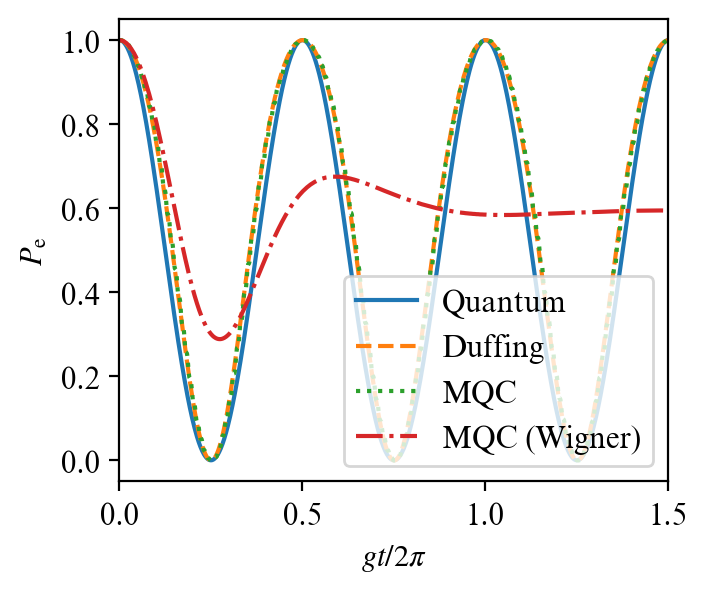

In [11]:
mode=196
print(n_values[mode])
print(frequencies[1+np.argmax(np.abs(fft_data[mode,1:]))])
plt.figure(figsize=(3.37,2.8), dpi=200)
plt.plot(plot_t/(2*np.pi), np.sum(wavefn_exact[:,int(wavefn_exact.shape[1]/2):], axis=1), label='Quantum')
plt.plot(t_values/(2*np.pi), y_values[mode]**2, label='Duffing', linestyle='dashed')
plt.plot(plot_t/(2*np.pi), MFf_wavefn[:,1], label='MQC', linestyle='dotted')
plt.plot(plot_t[:MFw_wavefn.shape[0]]/(2*np.pi), MFw_wavefn[:,1], label='MQC (Wigner)', linestyle='dashdot')
plt.xlabel(r"$gt/2\pi$")#, labelpad=1)
plt.ylabel(r"$P_\mathrm{e}$")#, labelpad=1)
plt.xticks((0.0, 0.5, 1.0, 1.5))
plt.xlim([0,1.5])
plt.legend(loc='lower right')
plt.tight_layout(pad=0.1)

plt.savefig('osc.pdf', dpi=600)